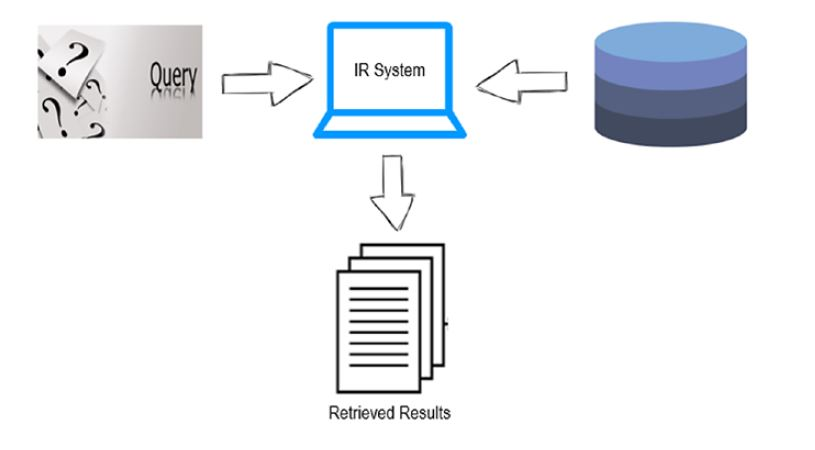

In [1]:
from IPython.display import Image
Image("C:\\Users\\ShahinN\\Desktop\\123423.JPG")

# ساخت / وارد کردن اسناد

In [2]:
Doc1 = ["With the Union cabinet approving the amendments to the Motor Vehicles Act, 2016, those caught for drunken driving will have to have really deep pockets, as the fine payable in court  has been enhanced to Rs 10,000 for first-time offenders."]
Doc2 = ["Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."]  

Doc3 = ["He points out that public transport is very good in Mumbai and New Delhi, where there is a good network of suburban and metro rail systems."]

Doc4 = ["But the man behind the wickets at the other end was watching just as keenly. With an affirmative nod from Dhoni, India captain Rohit Sharma promptly asked for a review. Sure enough, the ball would have clipped the top of middle and leg."]       

In [3]:
# Put all the documents in one list
fin= Doc1+Doc2+Doc3+Doc4

# وارد کردن کتابخانه ها

In [4]:

import gensim
from gensim.models import Word2Vec
import numpy as np
import nltk
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

C:\Users\ShahinN\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# بارگذاری مدل

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\ShahinN\\Desktop\\GoogleNews-vectors-negative300.bin', binary=True)


# ساخت سیستم IR

In [7]:
#Preprocessing
def remove_stopwords(text, is_lower_case=False):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, "", ",".join(text))
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
          
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
                                                  
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [8]:
# Function to get the embedding vector for n dimension, we have used "300"
def get_embedding(x): 
    if x in model.wv.vocab:
        return model[x]
    else:
        return np.zeros(300)


In [9]:
out_dict = {}
for sen in fin:
    average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(remove_stopwords(sen))]), axis=0))
                
    dict = { sen : (average_vector) }
    out_dict.update(dict)

C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
def get_sim(query_embedding, average_vector_doc):
    sim = [(1 - scipy.spatial.distance.cosine(query_embedding, average_vector_doc))]
    return sim

In [11]:
# Rank all the documents based on the similarity to get
def Ranked_documents(query):
    emb = [get_embedding(x) for x in nltk.word_tokenize(query.lower())]
    query_words = (np.mean(np.array(emb,dtype=float), axis=0))
    
    rank = []
    for k,v in out_dict.items():
        rank.append((k, get_sim(query_words, v)))
    
    rank = sorted(rank,key=lambda t: t[1], reverse=True)
    print('Ranked Documents :')
    return rank

In [14]:
Ranked_documents("artificial intelligence")

Ranked Documents :


C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
  [0.5173867828123971]),
 ('He points out that public transport is very good in Mumbai and New Delhi, where there is a good network of suburban and metro rail systems.',
  [0.2429788484361275]),
 ('But the man behind the wickets at the other end was watching just as keenly. With an affirmative nod from Dhoni, India captain Rohit Sharma promptly asked for a review. Sure enough, the ball would have clipped the top of middle and leg.',
  [0.2175021622311386]),
 ('With the Union cabinet approving the amendments to the Motor Vehicles Act, 2016, those caught for drunken driving will have to have really deep pockets, as the fine payable in court  has been enhanced to Rs 10,000 for first-time offenders.',
  [0.1731528